In [1]:
import sys
sys.path.insert(0, '/home/users/brezovec/.local/lib/python3.6/site-packages/lib/python/')
import ants
import os
import bigbadbrain as bbb
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy
from scipy.ndimage.filters import gaussian_filter
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d

%matplotlib inline

plt.rcParams.update({'font.size': 20})
root_directory = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/'

In [27]:
directory = os.path.join(root_directory,'fly_19','func_0')
timestamps = bbb.load_timestamps(os.path.join(directory, 'imaging'))
fictrac_raw = bbb.load_fictrac(os.path.join(directory, 'fictrac'))


~~ load_timestamps ~~
Trying to load timestamp data from hdf5 file.
Success.
load_timestamps done. Duration: 104.79 ms

~~ load_fictrac ~~
load_fictrac done. Duration: 3.13 sec


In [28]:
def interp_fictrac(fictrac, fps, resolution, expt_len, behavior):
    camera_rate = 1/fps * 1000 # camera frame rate in ms
    
    x_original = np.arange(0,expt_len,camera_rate)
    # 20ms resolution
    fictrac_smoothed = scipy.signal.savgol_filter(np.asarray(fictrac[behavior]),25,3)
    #fictrac_smoothed = scipy.ndimage.filters.gaussian_filter(np.asarray(fictrac[behavior]),sigma=sigma)
    #fictrac_smoothed = np.abs(fictrac_smoothed)
    fictrac_interp_temp = interp1d(x_original, fictrac_smoothed, bounds_error = False)
    xnew = np.arange(0,expt_len,resolution) #0 to last time at subsample res
    fictrac_interp = fictrac_interp_temp(xnew)

    # Replace Nans with zeros (for later code)
    np.nan_to_num(fictrac_interp, copy=False);
    
    return fictrac_interp

In [33]:
resolution = 10 #desired resolution in ms
expt_len = 1000*30*60
fps = 50 #of fictrac camera
behaviors = ['dRotLabY', 'dRotLabZ', 'dRotLabX']
fictrac = {}
for behavior in behaviors:
    if behavior == 'dRotLabY': short = 'Y'
    elif behavior == 'dRotLabZ': short = 'Z'
    elif behavior == 'dRotLabX': short = 'X'
    fictrac[short] = interp_fictrac(fictrac_raw, fps, resolution, expt_len, behavior)
xnew = np.arange(0,expt_len,resolution)

In [7]:
fictrac['Y'].shape

(180000,)

(-0.03, 0.05)

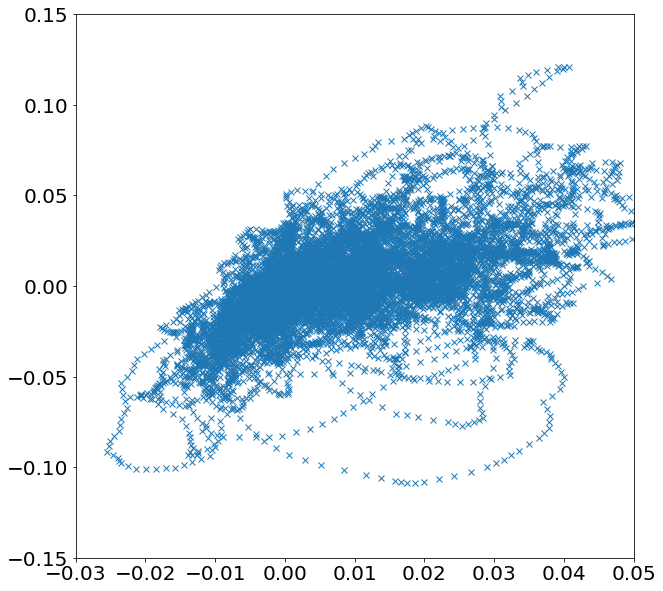

In [13]:
stop = 40000
plt.figure(figsize=(10,10))
plt.plot(fictrac['Y'][:stop], fictrac['Z'][:stop],'x')
plt.ylim(-.15,.15)
plt.xlim(-.03,.05)

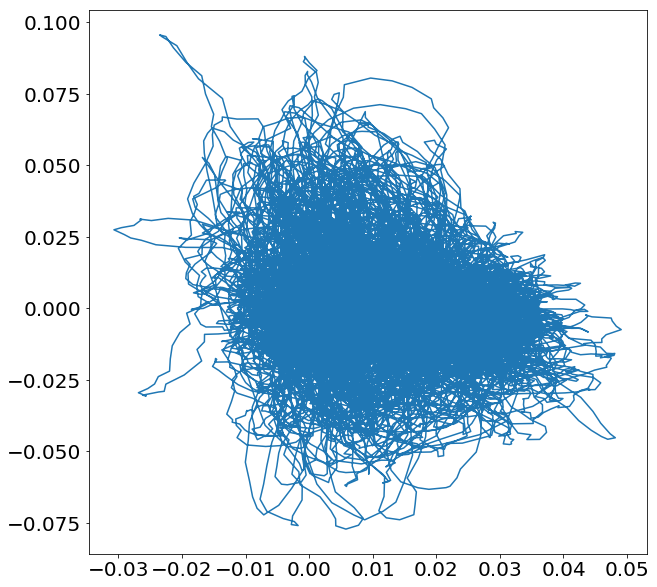

In [22]:
plt.figure(figsize=(10,10))
plt.plot(fictrac['Y'], fictrac['Z'])

(-0.03, 0.05)

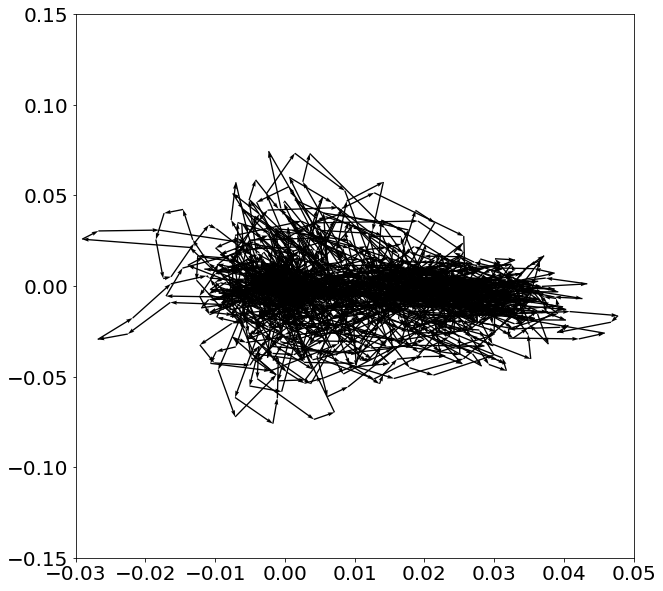

In [26]:
stop = 80000
plt.figure(figsize=(10,10))
x=fictrac['Y'][:stop:10]
y=fictrac['Z'][:stop:10]
plt.quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1)
plt.ylim(-.15,.15)
plt.xlim(-.03,.05)

(-0.03, 0.05)

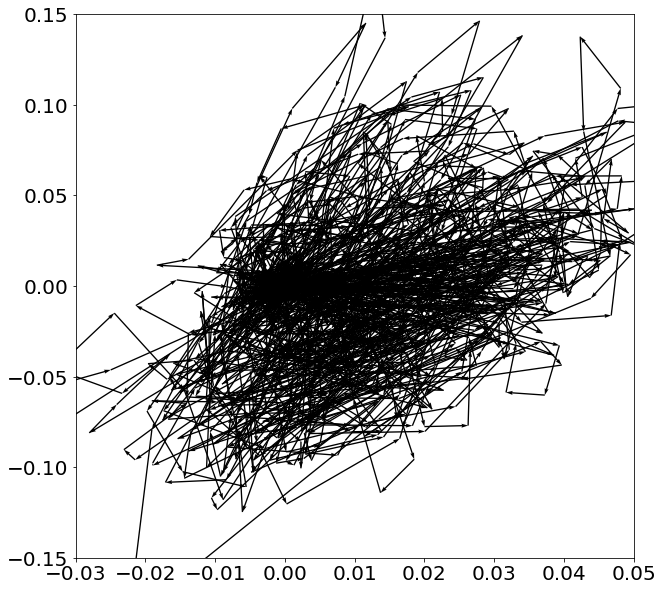

In [32]:
stop = 40000
plt.figure(figsize=(10,10))
x=fictrac['Y'][:stop:10]
y=fictrac['Z'][:stop:10]
plt.quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1)
plt.ylim(-.15,.15)
plt.xlim(-.03,.05)

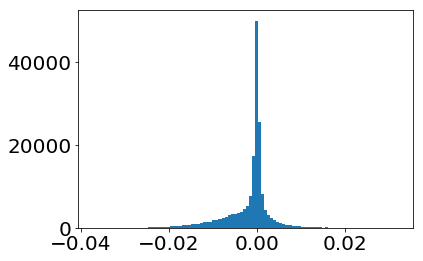

In [35]:
plt.hist(fictrac['X'],bins=100);

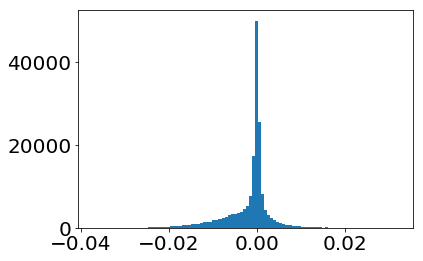

In [38]:
plt.hist(fictrac['X'],bins=100);